In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Prédire le niveau de stress en fonction du temps passé sur insta.

In [4]:
df = pd.read_csv("./dataset/instagram_users_lifestyle.csv")

df.head()        # voir les premières lignes
df.info()        # types des colonnes
df.describe()    # stats générales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547896 entries, 0 to 1547895
Data columns (total 58 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   user_id                         1547896 non-null  int64  
 1   app_name                        1547896 non-null  object 
 2   age                             1547896 non-null  int64  
 3   gender                          1547896 non-null  object 
 4   country                         1547896 non-null  object 
 5   urban_rural                     1547896 non-null  object 
 6   income_level                    1547896 non-null  object 
 7   employment_status               1547896 non-null  object 
 8   education_level                 1547896 non-null  object 
 9   relationship_status             1547896 non-null  object 
 10  has_children                    1547896 non-null  object 
 11  exercise_hours_per_week         1547896 non-null  float64
 12  

,user_id,age,exercise_hours_per_week,sleep_hours_per_night,perceived_stress_score,self_reported_happiness,body_mass_index,blood_pressure_systolic,blood_pressure_diastolic,daily_steps_count,...,time_on_explore_per_day,time_on_messages_per_day,time_on_reels_per_day,followers_count,following_count,notification_response_rate,account_creation_year,average_session_length_minutes,linked_accounts_count,user_engagement_score
count,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,...,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06,1.547896e+06
mean,7.739485e+05,3.898544e+01,7.143480e+00,6.999384e+00,1.998774e+01,5.499804e+00,2.500084e+01,1.244917e+02,7.950007e+01,8.000105e+03,...,3.762037e+01,3.295203e+01,5.647662e+01,2.160543e+03,2.604942e+03,5.002404e-01,2.018466e+03,2.050971e+01,1.975254e+00,1.644642e+00
std,4.468392e+05,1.529453e+01,3.994556e+00,1.097098e+00,1.183258e+01,2.871232e+00,3.976188e+00,2.020699e+01,1.154874e+01,8.939761e+01,...,2.535788e+01,2.144569e+01,3.534782e+01,3.402016e+03,2.751922e+03,2.887827e-01,4.613253e+00,8.697454e+00,1.352058e+00,1.812684e+00
min,1.000000e+00,1.300000e+01,0.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.500000e+01,9.000000e+01,6.000000e+01,7.566000e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,2.000000e+01,0.000000e+00,2.010000e+03,5.000000e+00,0.000000e+00,6.700000e-01
25%,3.869748e+05,2.600000e+01,4.000000e+00,6.300000e+00,1.000000e+01,3.000000e+00,2.230000e+01,1.070000e+02,7.000000e+01,7.940000e+03,...,1.800000e+01,1.600000e+01,2.900000e+01,5.430000e+02,6.630000e+02,2.500000e-01,2.015000e+03,1.330000e+01,1.000000e+00,1.000000e+00
50%,7.739485e+05,3.900000e+01,6.600000e+00,7.000000e+00,2.000000e+01,5.000000e+00,2.500000e+01,1.240000e+02,7.900000e+01,8.000000e+03,...,3.400000e+01,3.100000e+01,5.400000e+01,1.154000e+03,1.519000e+03,5.000000e-01,2.019000e+03,2.040000e+01,2.000000e+00,1.100000e+00
75%,1.160922e+06,5.200000e+01,9.700000e+00,7.700000e+00,3.000000e+01,8.000000e+00,2.770000e+01,1.420000e+02,9.000000e+01,8.060000e+03,...,5.300000e+01,4.700000e+01,8.000000e+01,2.459000e+03,3.451000e+03,7.500000e-01,2.022000e+03,2.760000e+01,3.000000e+00,1.290000e+00
max,1.547896e+06,6.500000e+01,2.410000e+01,1.000000e+01,4.000000e+01,1.000000e+01,4.500000e+01,1.590000e+02,9.900000e+01,8.473000e+03,...,1.710000e+02,1.380000e+02,2.220000e+02,2.088110e+05,1.000000e+04,1.000000e+00,2.026000e+03,5.200000e+01,5.000000e+00,1.867000e+01


Je fais un tableau avec toutes les possibilités de temps passé sur instagram. Pour choisir celui que je vais utiliser je vais calculer la correlation entre les valeurs de temps et le niveau de stress

In [27]:

#! Faire un tableau 
# colonnes de temps à analyser
time_columns = [
    'time_on_feed_per_day',
    'time_on_explore_per_day',
    'time_on_messages_per_day',
    'time_on_reels_per_day',
    'daily_active_minutes_instagram'
]

# garder uniquement les colonnes de temps + stress
df_time = df[time_columns + ["perceived_stress_score"]].dropna()

# calcul des corrélations avec le stress
correlations = df_time.corr()["perceived_stress_score"].drop("perceived_stress_score")

# trier par valeur absolue
correlations_sorted = correlations.abs().sort_values(ascending=False)

print("Corrélations avec le stress :")
print(correlations_sorted)

Corrélations avec le stress :
daily_active_minutes_instagram    0.834515
time_on_feed_per_day              0.813542
time_on_reels_per_day             0.779548
time_on_messages_per_day          0.749148
time_on_explore_per_day           0.724102
Name: perceived_stress_score, dtype: float64


/tmp/ipykernel_59966/3219580426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


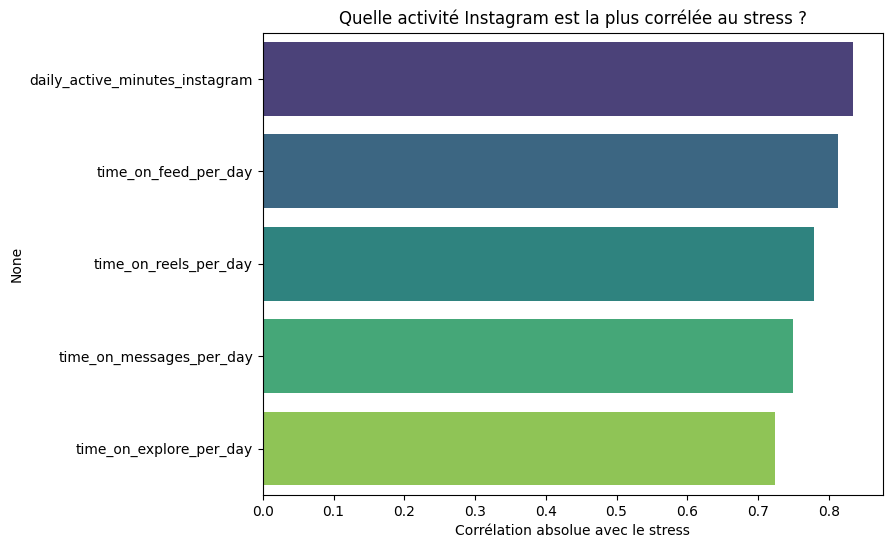

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(
    x=correlations_sorted.values,
    y=correlations_sorted.index,
    palette="viridis"
)
plt.xlabel("Corrélation absolue avec le stress")
plt.title("Quelle activité Instagram est la plus corrélée au stress ?")
plt.show()

Avec ce graphique on peut donc voir que le nombre de minutes par jour passé sur instagram a la plus grande correlation avec le niveau de stress

Je vais donc prendre cette valeur et la mettre dans un graphique adapté

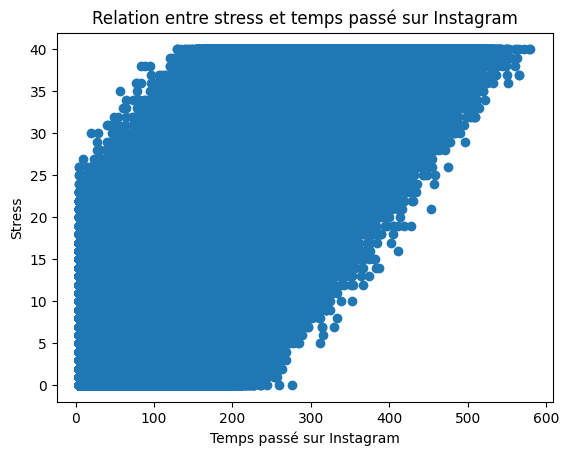

In [23]:
import numpy as np

plt.figure()
plt.scatter(df["daily_active_minutes_instagram"], df["perceived_stress_score"])
plt.xlabel("Temps passé sur Instagram")
plt.ylabel("Stress")
plt.title("Relation entre stress et temps passé sur Instagram")

plt.show()


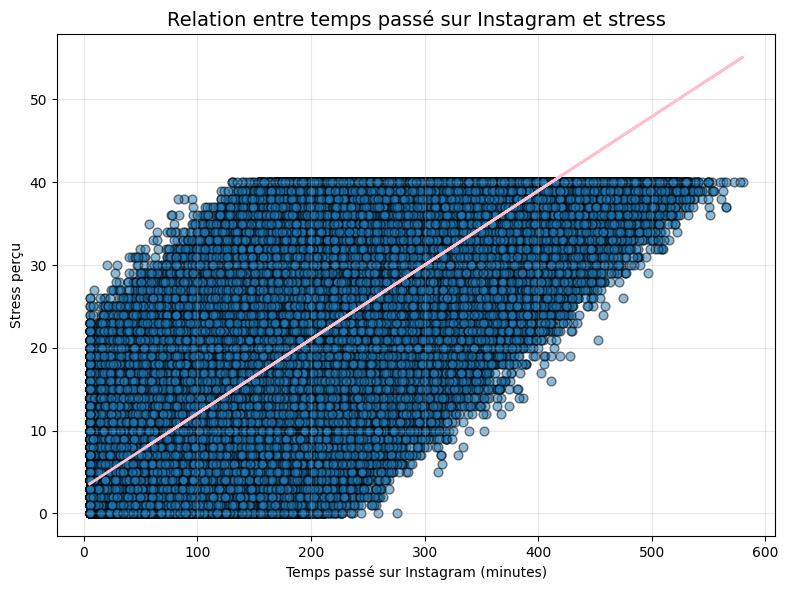

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Nettoyage (important si NaN)
df_clean = df[["daily_active_minutes_instagram", "perceived_stress_score"]].dropna()

x = df_clean["daily_active_minutes_instagram"]
y = df_clean["perceived_stress_score"]

# Calcul régression
m, b = np.polyfit(x, y, 1)
correlation = x.corr(y)

plt.figure(figsize=(8,6))

# Nuage de points
plt.scatter(
    x,
    y,
    alpha=0.5,
    s=40,
    edgecolor="black"
)

# Ligne de régression
plt.plot(
    x,
    m*x + b,
    linewidth=2,
    color="pink"
)

# Titres et labels
plt.title("Relation entre temps passé sur Instagram et stress", fontsize=14)
plt.xlabel("Temps passé sur Instagram (minutes)")
plt.ylabel("Stress perçu")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Le type de lien est de type linéaire, pour prédire je vais donc prendre un modèle de type regression linéaire

RMSE : 6.521063182909441
R² : 0.6968286407670241


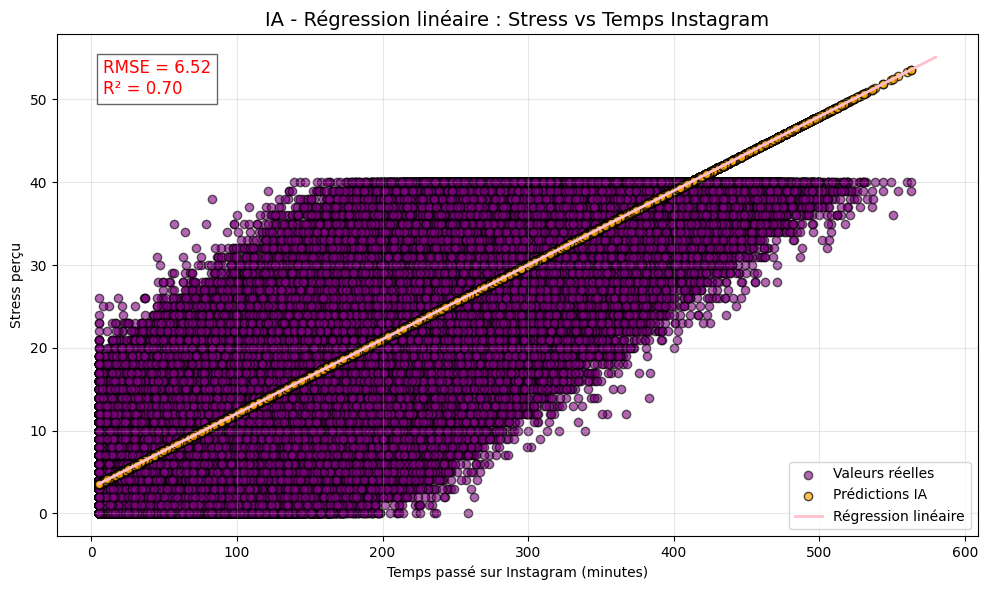

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Nettoyage des données
df_clean = df[["daily_active_minutes_instagram", "perceived_stress_score"]].dropna()

X = df_clean[["daily_active_minutes_instagram"]].values
y = df_clean["perceived_stress_score"].values

# 2️⃣ Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ Modèle
model = LinearRegression()
model.fit(X_train, y_train)

# 4️⃣ Prédictions
y_pred = model.predict(X_test)

# 5️⃣ Calcul des erreurs
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("RMSE :", rmse)
print("R² :", r2)

# 6️⃣ Graphique
plt.figure(figsize=(10,6))

# Points réels (test uniquement)
plt.scatter(
    X_test,
    y_test,
    color="purple",
    alpha=0.6,
    edgecolor="black",
    label="Valeurs réelles"
)

# Points prédits
plt.scatter(
    X_test,
    y_pred,
    color="orange",
    alpha=0.7,
    edgecolor="black",
    label="Prédictions IA"
)

# Ligne de régression (sur toute la data pour esthétique)
x_line = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_line = model.predict(x_line)

plt.plot(
    x_line,
    y_line,
    color="pink",
    linewidth=2,
    label="Régression linéaire"
)

# Affichage des erreurs en rouge
plt.text(
    0.05, 0.95,
    f"RMSE = {rmse:.2f}\nR² = {r2:.2f}",
    transform=plt.gca().transAxes,
    verticalalignment='top',
    fontsize=12,
    color="red",
    bbox=dict(facecolor='white', alpha=0.6)
)

plt.title("IA - Régression linéaire : Stress vs Temps Instagram", fontsize=14)
plt.xlabel("Temps passé sur Instagram (minutes)")
plt.ylabel("Stress perçu")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Pour ajouter de la précision, je vais rajouter la marge d'erreur entre les données réelle et les données prédis

/tmp/ipykernel_59966/2968751499.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/manon/.local/lib/python3.14/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


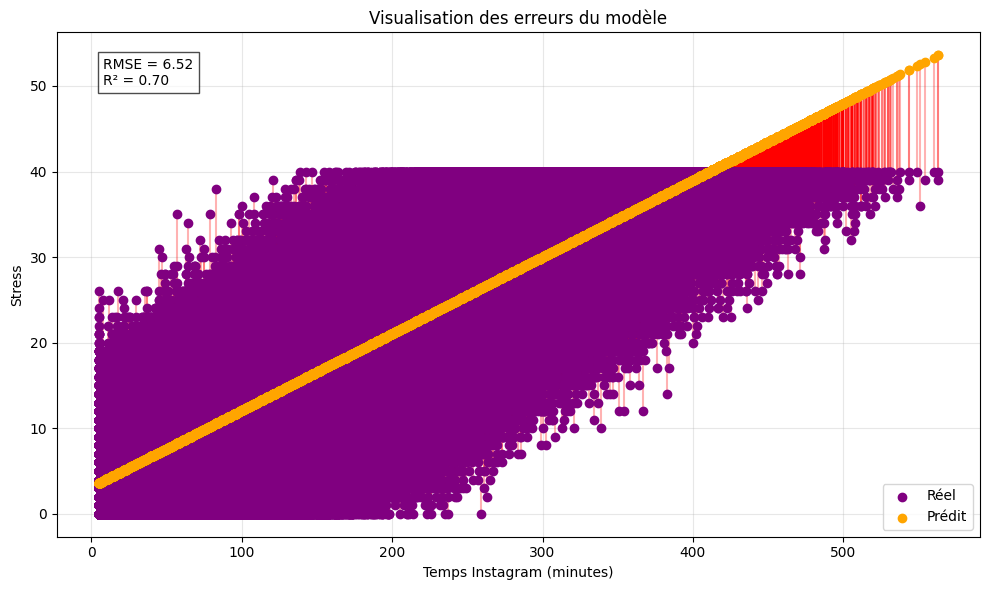

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 1️⃣ Nettoyage
df_clean = df[["daily_active_minutes_instagram", "perceived_stress_score"]].dropna()

X = df_clean[["daily_active_minutes_instagram"]].values
y = df_clean["perceived_stress_score"].values

# 2️⃣ Train / Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ Modèle
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4️⃣ Métriques
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 5️⃣ Graphique
plt.figure(figsize=(10,6))

# Points réels
plt.scatter(X_test, y_test, color="purple", label="Réel", zorder=3)

# Points prédits
plt.scatter(X_test, y_pred, color="orange", label="Prédit", zorder=3)

# 🔴 Lignes d'erreur entre réel et prédit
for i in range(len(X_test)):
    plt.plot(
        [X_test[i], X_test[i]],
        [y_test[i], y_pred[i]],
        color="red",
        alpha=0.3
    )

plt.title("Visualisation des erreurs du modèle")
plt.xlabel("Temps Instagram (minutes)")
plt.ylabel("Stress")
plt.legend()
plt.grid(alpha=0.3)

# Affichage métriques
plt.text(
    0.05, 0.95,
    f"RMSE = {rmse:.2f}\nR² = {r2:.2f}",
    transform=plt.gca().transAxes,
    verticalalignment='top',
    color="black",
    bbox=dict(facecolor='white', alpha=0.7)
)

plt.tight_layout()
plt.show()

La conclusion est qu'il existe bien une correlation entre stress et temps passé sur instagram, mais il faudrait surement plus de paramètre affiner le résultat